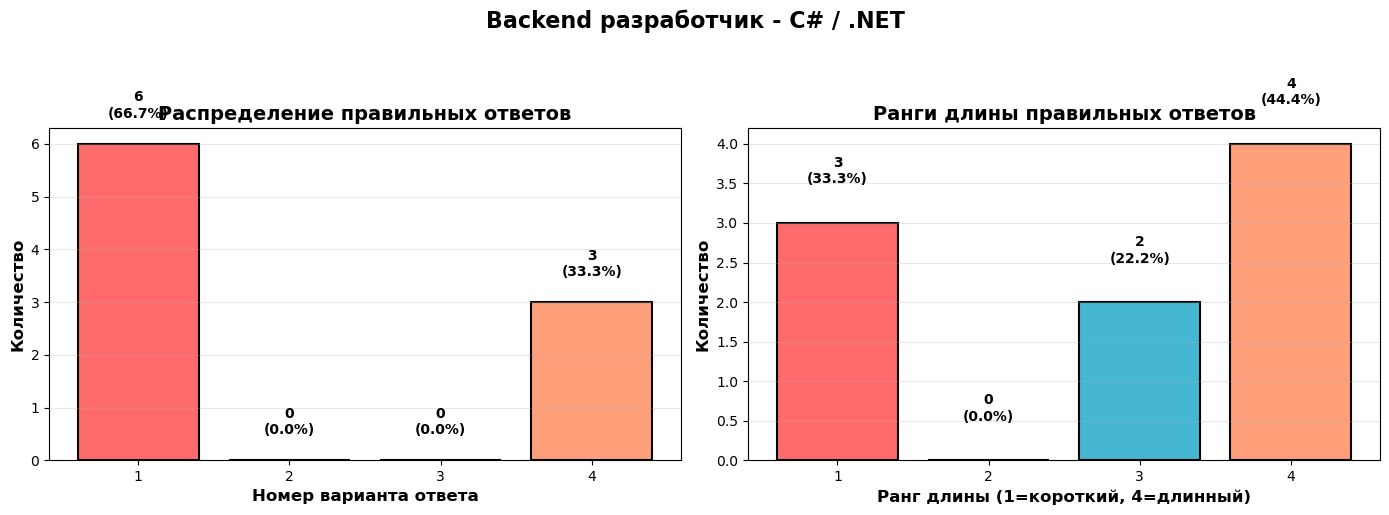


📊 Backend разработчик - C# / .NET
Всего вопросов: 9
⚠️  Самый длинный вариант правильный в 44.4% случаев


In [3]:
import json
import matplotlib.pyplot as plt
from collections import Counter

def plot_answer_analysis(file_path):
    """
    Строит 2 графика: распределение правильных ответов и ранги длин
    """
    
    # Чтение JSON
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    correct_answers = []
    length_ranks = []
    
    # Собираем данные
    for competency in data['competencies']:
        for topic in competency['topics']:
            for question in topic['questions']:
                # Правильный ответ
                correct_answers.append(question['correct_answer'])
                
                # Длины всех вариантов
                lengths = []
                for i in range(1, 5):
                    var_key = f'var_{i}'
                    lengths.append(len(question[var_key]))
                
                # Ранжируем: 1=shortest, 4=longest
                sorted_indices = sorted(range(4), key=lambda x: lengths[x])
                ranks = [0] * 4
                for rank, idx in enumerate(sorted_indices, 1):
                    ranks[idx] = rank
                
                # Сохраняем ранг правильного ответа
                correct_idx = question['correct_answer'] - 1
                length_ranks.append(ranks[correct_idx])
    
    # Подсчет
    correct_dist = Counter(correct_answers)
    rank_dist = Counter(length_ranks)
    
    # Создаем графики
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # График 1: Распределение правильных ответов
    variants = [1, 2, 3, 4]
    counts = [correct_dist[v] for v in variants]
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']
    
    ax1.bar(variants, counts, color=colors, edgecolor='black', linewidth=1.5)
    ax1.set_xlabel('Номер варианта ответа', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Количество', fontsize=12, fontweight='bold')
    ax1.set_title('Распределение правильных ответов', fontsize=14, fontweight='bold')
    ax1.set_xticks(variants)
    ax1.grid(axis='y', alpha=0.3)
    
    # Добавляем проценты
    total = sum(counts)
    for i, (v, c) in enumerate(zip(variants, counts)):
        percentage = (c / total) * 100
        ax1.text(v, c + 0.5, f'{c}\n({percentage:.1f}%)', 
                ha='center', fontweight='bold', fontsize=10)
    
    # График 2: Распределение рангов длины
    ranks = [1, 2, 3, 4]
    rank_counts = [rank_dist[r] for r in ranks]
    
    ax2.bar(ranks, rank_counts, color=colors, edgecolor='black', linewidth=1.5)
    ax2.set_xlabel('Ранг длины (1=короткий, 4=длинный)', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Количество', fontsize=12, fontweight='bold')
    ax2.set_title('Ранги длины правильных ответов', fontsize=14, fontweight='bold')
    ax2.set_xticks(ranks)
    ax2.grid(axis='y', alpha=0.3)
    
    # Добавляем проценты
    for i, (r, c) in enumerate(zip(ranks, rank_counts)):
        percentage = (c / total) * 100
        ax2.text(r, c + 0.5, f'{c}\n({percentage:.1f}%)', 
                ha='center', fontweight='bold', fontsize=10)
    
    plt.suptitle(f"{data['profile']} - {data['specialization']}", 
                 fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
    
    # Выводим предупреждения
    print(f"\n📊 {data['profile']} - {data['specialization']}")
    print(f"Всего вопросов: {total}")
    
    # Проверка на паттерн правильных ответов
    max_correct = max(counts)
    if max_correct > total * 0.7:
        print(f"⚠️  ВНИМАНИЕ! Вариант {counts.index(max_correct)+1} правильный в {(max_correct/total)*100:.1f}% случаев!")
    
    # Проверка на паттерн длины
    if rank_counts[3] > total * 0.5:  # Если ранг 4 (самый длинный) > 50%
        print(f"🚨 КРИТИЧНО! Самый длинный вариант правильный в {(rank_counts[3]/total)*100:.1f}% случаев!")
    elif rank_counts[3] > total * 0.35:
        print(f"⚠️  Самый длинный вариант правильный в {(rank_counts[3]/total)*100:.1f}% случаев")

# Использование
plot_answer_analysis("Backend_C#&.NET.json")